(irm-chapitre)=
# Imagerie par résonance magnétique

<table>
  <tr>
    <td align="center">
      <a href="https://github.com/me-pic">
        <img src="https://avatars.githubusercontent.com/u/77584086?v=4?s=100" width="100px;" alt=""/>
        <br /><sub><b>Marie-Eve Picard</b></sub>
      </a>
      <br />
        <a title="Contenu">🤔</a>
    </td>
    <td align="center">
      <a href="https://github.com/pbellec">
        <img src="https://avatars.githubusercontent.com/u/1670887?v=4?s=100" width="100px;" alt=""/>
        <br /><sub><b>Pierre bellec</b></sub>
      </a>
      <br />
        <a title="Contenu">🤔</a>
        <a title="Quizz">⚠️</a>
        <a title="Révision du texte">👀</a>
    </td>
  </tr>
</table>

```{warning}
Ce chapitre est en cours de développement. Il se peut que l'information soit incomplète, ou sujette à changement.
```

## Objectifs du cours
Ce cours a pour but de vous initier aux principes physiques de l'imagerie par résonance magnétique. Au courant de ce cours, nous allons aborder quatre principes fondamentaux de l'IRM:
 * La résonance magnétique
 * La relaxation : paramètres T1 et T2
 * La formation d'images
 * Les séquences IRM

## Anatomie d'un IRM

```{figure} ./irm/irm_schema.png
---
width: 800px
name: irm-schema-fig
---
Illustration schématique des principales composantes d'un appareil IRM. Figure générée par P. Bellec, 2021, sous licence CC-BY.
```
{numref}`irm-schema-fig` nous permet d'observer les éléments principaux d'un appareil IRM, et en particulier:
 * L'**aimant**: il s'agit d'une bobine supraconductrice qui génère un champ magnétique très important.

 * Les **bobines de gradient**: permettent de faire varier l'intensité du champ magnétique dans l'espace. Durant l'acquisition des images, les gradients sont activés puis arrêtés plusieurs fois. Les gradients peuvent être produits dans toutes les directions.  

 * L'**antenne radio-fréquence**: permet de (1) exciter la matière grâce à des émetteurs, et (2) mesurer la réponse de ces tissus biologiques à l'excitation grâce à des récepteurs. Les impulsions radio-fréquence générées par l'antenne crée un faible champ magnétique perpendiculaire au champ magnétique principal généré par l'aimant. Les antennes de réception peuvent aussi être placées dans un équipement spécifique pour la tête.

 Nous allons parler plus en profondeur du fonctionnement de tous ces éléments dans les prochaines sections.
```{warning}
L'IRM est très sensible aux mouvements de la tête ! Il est possible d'utiliser des coussins ou autres dispositifs pour réduire le mouvement.
```

```{admonition} Bobine + courant = champ magnétique !
En créant un anneau avec du fil électrique et en passant un courant électrique, nous produisons un champ magnétique. Dans la vidéo ci-dessous, nous pouvons voir les lignes de champ magnétique se dessiner lorsque le champ magnétique est activé. Les lignes de champ sont droites lorsqu'elles passent par le centre de l'anneau, mais elles se propagent en cercles en s'éloignant du centre de l'anneau. Pour obtenir un champ magnétique constant à l'intérieur de l'anneau, nous pouvons épaissir l'anneau de sorte à former un cylindre. C'est le même principe que nous retrouvons dans un appareil IRM !
```

In [1]:
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/bq6IhapfucE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## Spin magnétique et champ B0
```{figure} ./irm/spin.png
---
width: 800px
name: spin-fig
---
Un proton est comme un petit aimant, dont le champ magnétique oscille autour d’une position donnée (mouvement de précession), et caractérisé par a moment angulaire, ou spin.  Partie droite de la figure générée par P. Bellec, 2021, sous licence CC-BY. La partie gauche de la figure est adaptée d'une image [shutterstock](https://www.shutterstock.com) ID `130826045`, utilisée sous licence shutterstock standard.
```

Les protons qui constituent en partie les atomes se comportent comme des petits aimants qui tournent autour de leur propre axe, de manière analogue à une toupie (voir {numref}`spin-fig`). Cette rotation du moment magnétique est appelé le mouvement de précession et dépend entre autre de la composition du noyau. Ainsi, chaque type de noyau possède une *fréquence de Larmor* caractéristique.

```{admonition} Fréquence de Larmor d'un atome d'hydrogène
Un atome d'hydrogène possède une fréquence de Larmor de 42.58 MHz/Tesla. Cette fréquence n'est donc pas fixe, mais **dépend de la force du champ magnétique!**  Placé dans un champ magnétique externe de 1T, un atome d'hydrogène tourne 42580000 fois par seconde. Plus le champ magnétique dans lequel se trouve un proton est fort, plus la vitesse à laquelle tourne le moment magnétique de ce proton va augmenter.
```

L'aimant de l'IRM contribue à aligner le moment magnétique des protons selon le même axe que le champ magnétique principal, appelé B0. Ce champ B0 va des pieds vers la tête. La force de l'aimant principal est mesurée en Teslas (T). Les appareils de 1.5T sont utilisés principalement à des fins cliniques alors qu'en recherche, le standard est plutôt de 3T, ce qui est environ 60000 fois plus puissant que le champ magnétique terrestre! Les appareils à 7T représente à ce jour la nouvelle frontière utilisée en recherche, et quelques appareils à 10T+ existent dans le monde. Mais pourquoi voudrions-nous augmenter la force du champ magnétique? En augmentant la force du champ magnétique, nous pouvons gagner en résolution spatiale et temporelle. Par contre, augmenter la force du champ magnétique peut également introduire des artefacts!

## Résonance magnétique
```{admonition} La résonance... pas juste magnétique
Nous retrouvons les phénomènes de résonance dans de nombreuses situations. Un exemple connu est la résonance entre le vent et le pont de Tacoma, qui a mené à l'effondrement du pont, voir la vidéo ci dessous.
```

In [2]:
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/3mclp9QmCGs" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Nous pouvons penser à la résonance comme un mouvement de balançoire. Si nous poussons la balançoire de manière aléatoire, elle n'oscillera pas beaucoup. Pour avoir un mouvement de balançoire qui s'amplifie, nous devons pousser la balançoire à la même fréquence que la fréquence naturelle de l'oscillation de la balançoire. Nous allons alors **entrer en résonance** avec la balançoire, et son mouvement va s'amplifier. Nous pouvons donc voir la balançoire comme un phénomène de résonance entre l'objet qui se balance et la personne qui donne une impulsion à cet objet.

L'IRM exploite ce phénomène de résonance. **L'antenne radio-fréquence (RF)** crée une série d'**ondes radio-fréquences** dans la direction perpendiculaire au champ B0, c'est-à-dire en direction du champ B1. En produisant une série d'impulsions suivant la fréquence de Larmor de l'hydrogène, les atomes d'hydrogène entrent en résonance et basculent dans la direction perpendiculaire.

En arrêtant les impulsions, les atomes d'hydrogène entrent en relaxation, c'est-à-dire que leur moment magnétique va retourner dans la direction initiale B0. Autrement dit, le moment magnétique en direction B1 décroit pour revenir dans la direction B0. Ce phénomène de relaxation est très important, car la vitesse de la relaxation va dépendre des caractéristiques des tissus qui ont été excités. La vitesse de relaxation est mesurée par les antennes de réception placées dans le casque autour de la tête du sujet!

```{admonition} Mise en phase
Il est important de comprendre que le signal que nous mesurons en IRM ne provient pas d'un unique proton. Pour référence, 18 grammes d'eau contiennent une [mole](https://fr.wikipedia.org/wiki/Mole_(unité)) de molécules H2O, soient environ $10^{24}$ atomes d'hydrogène... Le signal que nous mesurons provient de la juxtaposition des spins de l'ensemble de ces atomes. Une onde radio-fréquence qui entre en résonance avec l'hydrogène ne va pas juste faire basculer les spins, mais aussi les mettre en phase. Imaginez que vous avez mille balançoires, que vous poussez au même moment (à la bonne fréquence). Non seulement le mouvement des balançoires va gagner en amplitude, mais toutes les balançoires seront au même point de leur trajectoire au même moment. C'est la même chose pour les spins après une excitation.
```

```{admonition} Pourquoi radio?
Comme nous l'avons vu, la fréquence de Larmor de l'hydrogène est de 42.58 MHz/Tesla. Dans un IRM à 3T, nous allons donc exciter avec une onde à une fréquence d'environ 120 MHz, soit 120 millions d'ondes par secondes (!). Ce type de fréquences tombe dans le domaine des [ondes radio](https://fr.wikipedia.org/wiki/Onde_radio).
```

## Sélection de coupes et formation d'images  

Nous avons vu comment une onde radio-fréquence permet d'exciter les noyaux d'hydrogène et mesurer la réponse à cette excitation pour interroger les caractéristiques des tissus. Mais comment faire une image? Les **bobines de gradient** permettent de faire varier l'amplitude du champ magnétique dans trois directions:
 * Direction z : des pieds vers la tête
 * Direction x : de la gauche vers la droite
 * Direction y : de l'arrière de la tête vers le nez

Ces variations sont beaucoup plus faibles que le champ B0, et ne représentent qu'une fraction de teslas, mais cela va nous permettre d'extraire une information spatiale dans un processus de résonance. À l'aide de ces gradients, il est possible de mesurer des propriétés magnétiques de tissus situés à un point spécifique dans l'espace, et donc de faire une image (3D). Ce processus est complexe, mais la première étape est relativement simple à comprendre: c'est la sélection de coupe.

Nous nous rappellons que la fréquence de Larmor d'une particule dépend de la force du champ magnétique dans lequel elle se trouve. En changeant la force du champ magnétique dans une direction donnée grâce aux bobines de gradient, nous allons modifier la fréquence de Larmor des atomes d'hydrogène à un endroit précis du gradient. Les impulsions radio-fréquence ne viendront exciter les atomes d'hydrogène que dans la coupe où le champ magnétique a la force qui correspond à la fréquence d'excitation. De cette manière, au lieu de recevoir du signal de l'ensemble du cerveau, nous ne recevons du signal que de la coupe sélectionnée, car seuls les atomes d'hydrogène dans cette coupe seront rentrés en résonance.

Il nous reste encore à découper notre coupe en pixels... Mais cela sort largement du contexte de ce chapitre d'introduction. Pour en apprendre plus sur l'encodage spatial en IRM, vous pouvez consulter cette [ressource](https://www.imaios.com/en/e-Courses/e-MRI/Signal-spatial-encoding/Spatial-encoding-intro) (en anglais).

## Contrastes T1 et T2
Les contrastes T1 et T2 sont les paramètres principaux acquis durant une séance IRM. Initialement, les spins des protons d'hydrogène sont alignés avec B0. L'application d'impulsions RF fait basculer les spins selon l'axe B1, axe perpendiculaire à B0. Une fois les impulsions RF arrêtées, les spins se réalignent avec le champ B0. Ce réalignement est caractérisé par:

1. La composante selon B0 augmente

> L'augmentation de la composante selon B0 (composante Mz) suit une fonction exponentielle croissante. Le temps caractéristique de cette croissance (la vitesse de croissance) s'appelle le **T1 (relaxation longitudinale)**. Le temps T1 correspond au temps écoulé pour obtenir 63% de la valeur d'équilibre de la contribution du moment magnétique selon l'axe z (M0).

```{admonition} M0
:class: tip
:name: M0-tip
À l'état d'équilibre, la contribution du moment magnétique selon l'axe z est appelée B0. Cette valeur dépend de la densité de protons dans les tissus. Ainsi, d'un voxel à un autre, nous n'obtenons pas nécessairement la même valeur de M0.
```

2. La composante selon B1 diminue

> La diminution de la composante selon B1 (composante Mxy) suit plutôt une fonction exponentielle décroissante. Le temps caractéristique de cette décroissance s'appelle le **T2 (relaxation transverse)**.

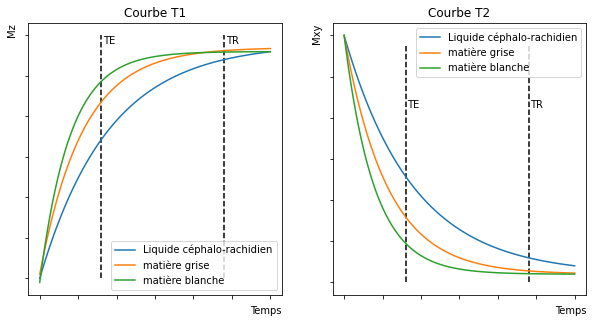

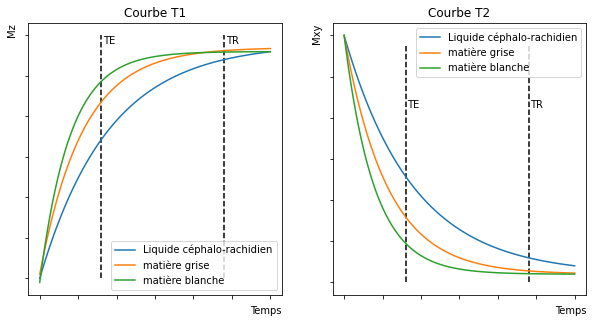

In [3]:
# Enlève les warnings
import warnings
warnings.filterwarnings("ignore")

# Improte les librairies nécessaires
import matplotlib.pyplot as plt
import numpy as np
from myst_nb import glue

# Initialise la figure
fig = plt.figure(figsize=(10, 5))

# Fonctions exponentielles pour les courbes T1 (à titre d'exemple seulement)
x = np.linspace(0,15,100)
y1 = -5.8 * 0.8**x +5.8
y2 = -5.6 * 0.7**x +5.7
y3 = -5.7 * 0.6**x + 5.6

# Tracer la figure
plt.subplot(1, 2, 1)
plt.plot(x,y1,label="Liquide céphalo-rachidien")
plt.plot(x,y2,label="matière grise")
plt.plot(x,y3,label="matière blanche")
plt.vlines(4, 0, 6, colors="black", linestyles="--")
plt.text(4.1,5.8,"TE")
plt.vlines(12, 0, 6, colors="black", linestyles="--")
plt.text(12.1,5.8,"TR")
plt.xlabel("Temps", loc="right")
plt.ylabel("Mz", loc="top")
plt.title("Courbe T1")
plt.legend()
plt.gca().axes.yaxis.set_ticklabels([])
plt.gca().axes.xaxis.set_ticklabels([])

# Fonctions exponentielles pour les courbes T2 (à titre d'exemple seulement)
y4 = 11.6 * 0.8**x +0.4
y5 = 11.6 * 0.7**x +0.4
y6 = 11.6 * 0.6**x +0.4

# Tracer la figure
plt.subplot(1, 2, 2)
plt.plot(x,y4,label="Liquide céphalo-rachidien")
plt.plot(x,y5,label="matière grise")
plt.plot(x,y6,label="matière blanche")
plt.vlines(4, 0, 11.5, colors="black", linestyles="--")
plt.text(4.1,8.5,"TE")
plt.vlines(12, 0, 11.5, colors="black", linestyles="--")
plt.text(12.1,8.5,"TR")
plt.xlabel("Temps", loc="right")
plt.ylabel("Mxy", loc="top")
plt.title("Courbe T2")
plt.legend()
plt.gca().axes.yaxis.set_ticklabels([])
plt.gca().axes.xaxis.set_ticklabels([])

glue("trte-fig", fig, display=False)

```{glue:figure} trte-fig
:figwidth: 800px
:name: "trte-fig"
La figure de gauche représente la repousse du champ magnétique selon l'axe `Mz`, aligné avec le champ `B0`. La figure de droite représente la décroissance du champ magnétique selon l'axe `Mxy`, perpendiculaire au champ B0. Notez que différents types de tissus présentent des dynamiques différentes, aussi bien selon `Mz` que selon `Mxy`. Cette figure est générée par du code python à l'aide de la librairie [matplotlib](https://matplotlib.org/), cliquer sur + pour voir le code.
```
**TR, TE et champ de vue (FOV)**

Temps de répétition (TR): délai entre les excitations des atomes d'hydrogène (entre les impulsions RF).
<br>Temps d'écho (TE): délai entre les impulsions RF et l'acquisition des points de mesure.

Lorsque nous acquièrons des données IRM, nous ne mesurons pas la valeur de Mz à plusieurs temps pour réproduire la courbe. Nous prenons simplement un point de mesure au temps TE. Les différents tissus que nous retrouvons dans le cerveau vont avoir des courbes de croissance différentes. En choississant le TE adéquatement, nous allons obtenir des valeurs T1 différentes pour la matière blanche (++), la matière grise (+) et le liquide céphalo-rachidien (-).

---
***Réfléchissez-y !***

Pourquoi s'embêter à faire des contrastes T1 et T2 quand l'un semble être l'exact opposé de l'autre ?

Observez  bien les images ci-dessous. Y a-t-il certaines régions du cerveau où l'image T2 n'est pas l'exact opposé de l'image T1 ?

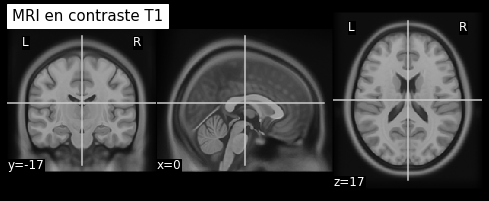

In [4]:
#Importer les modules requis et le jeu de données
from nilearn.datasets import fetch_icbm152_2009
from nilearn.plotting import plot_anat

data_mri = fetch_icbm152_2009()

#afficher l'image pondérée en T1
plot_anat(data_mri.t1, title="MRI en contraste T1")

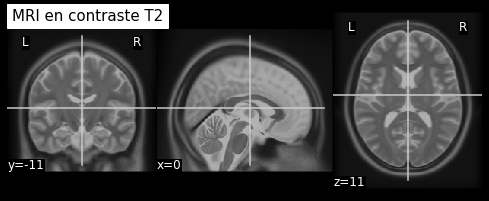

In [5]:
#afficher l'image pondérée en T2
plot_anat(data_mri.t2, title="MRI en contraste T2")

*En T2, nous pouvons entre autre voir une partie gris foncé au niveau des noyaux gris centraux. Ces différences sont liées au fait que ces structures possèdent des compositions chimiques différentes qui vont créer des **déphasages** importants. Le contraste T2 est sensible au déphasage alors que le contraste T1 ne l'est pas, faisant en sorte que ces contrastes ne sont pas l'exact opposé l'un de l'autre ! Nous reparlerons du déphasage dans la prochaine section.*

---

Bref, les processus de relaxation en T1 et en T2 ne vont pas capturer les mêmes aspects au niveau des tissus. Grâce aux antennes radio-fréquence, nous pouvons construire les contrastes et les mesurer, ce qui nous permet ultimement de faire des cartes du cerveau !

In [6]:
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/xzmMqHB0uyM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## T2* et séquences d'acquisition
Dans la section précédentes, nous avons vu les contrastes T1 et T2 qui nous permettent d'observer les différents tissus du cerveau (matière grise et matière blanche) et le liquide céphalo-rachidien. Le contraste le plus utilisé pour obtenir des images structurelles est le T1. Dans le [cours sur les cartes cérébrales](https://psy3018.github.io/cartes_cerebrales.html), nous avons vu qu'il existait d'autres types d'IRM. Ces différents types d'IRM vont utiliser des séquences d'acquisition différentes.

Revenons sur le concept de déphasage précédement introduit. En soumettant les tissus à une même impulsion RF, le moment magnétique des protons s'aligne dans la même direction et leur mouvement de rotation se synchronise (i.e., que les protons sont en phase). Lorsque nous arrêtons les impulsions RF, il va y avoir des différences dans le mouvement de précession des protons. C'est le phénomène de déphasage. Les mouvements de précession des protons sont de plus en plus déphasés au fur et à mesure qu'ils retournent à l'équilibre (i.e., alignés avec B0). La décroissance selon l'axe B1 est donc aussi influencé par ce phénomène de déphasage.

Nous avons vu que le champ magnétique B0 permettait d'homogénéisé le champ magnétique dans le cerveau. Certaines molécules agissent comme des aimants et viennent créer des irrégularités dans le champ magnétique, ce qui va accélérer le déphasage des spins. Lorsque nous observons le T2 en présence d'irrégularités, la composante selon B1 décroit plus rapidement. C'est ce que nous appelons le T2* ou T2 apparent.

Ces inhomogénéités dans le champ magnétique peuvent entre autre être créées par l'oxyhémoglobine et la déoxyhémoglobine que l'on retrouve dans le sang. Nous allons voir plus en détails comment l'oxyhémoglobine et la déoxyhémoglobine perturbent le champ magnétique dans le chapitre sur l'[IRM fonctionnelle](https://psy3018.github.io/irm_fonctionnelle.html). En IRM fonctionnelle, nous utilisons des séquences pondérées en T2*.

**Formation d'images en IRMf**

Nous pouvons observer deux principales différences entre l'image pondérée en T2* et l'image pondérée en T1:
 1. L'image pondérée en T2* est inversé par rapport à l'image en T1.
 2. L'image pondérée en T2* est plus floue que l'image pondérée en T1 puisque les voxels sont plus gros.
 3. Le temps d'acquisition des images T2* est beaucoup plus court (1-2s) que celui des images T1 (10min).

Quelle est l'utilité d'acquérir des voxels plus gros si ne nous pouvons pas voir correctement l'anatomie du cerveau ? En fait, ce qui nous intéresse en IRMf c'est plutôt les changements d'oxygénation locaux, i.e., les inhomogénéités dans le champ magnétique créés par le ratio d'oxyhémoglobine et de déoxyhémoglobine.


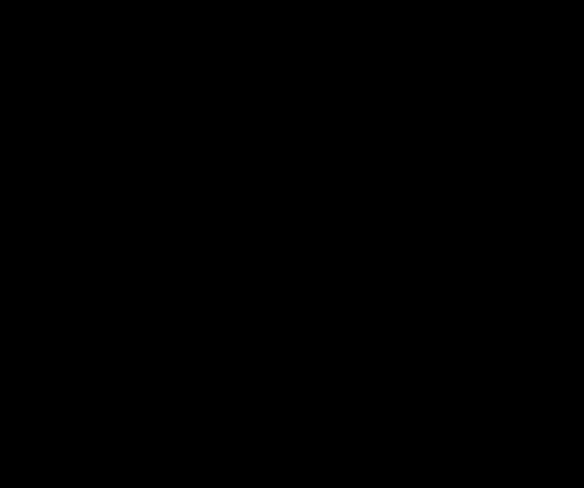
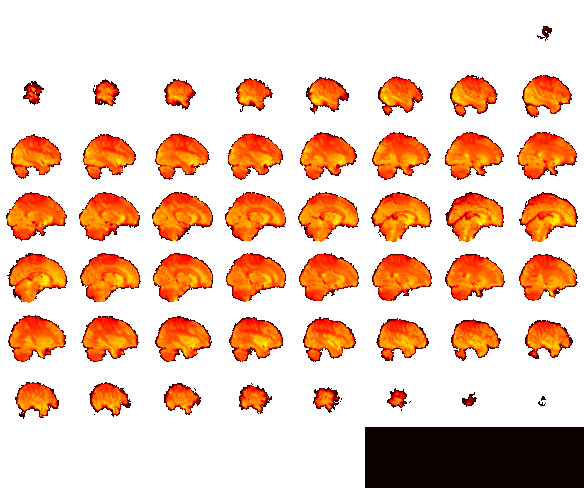

In [7]:
#Importer les modules requis et le jeu de données
from nilearn.plotting import view_img
from nilearn.image import index_img
from nilearn.datasets import fetch_adhd

adhd = fetch_adhd(n_subjects=1)

#Afficher le premier volume de la série
view_img(index_img(adhd.func[0], 0),
              bg_img=None,
              black_bg=True,
              title="un volume BOLD")

**Formation d'images en IRM de diffusion**

En IRM de diffusion, nous utilisons également un contraste en T2*. Par contre, en IRM de diffusion, nous mesurons les inhomogénéités en alternant la direction des impulsions (ex. en donnant une impulsion selon l'axe xy, puis en donnant une impulsion selon l'axe -xy). En effectuant plusieurs images avec des directions d'excitation différentes, nous pouvons obtenir une idée de la direction de la diffusion de l'eau. Cette opération nous permet au finl de connaître la direction des fibres de matière blanche, car plus une fibre pointe vers une direction donnée, plus la diffusion sera grande dans cette direction. Nous allons revenir sur ce sujet dans le chapitre sur [l'IRM de diffusion](https://psy3018.github.io/irm_diffusion.html)

**Séquences IRM**

Nous pouvons mesurer différentes propriétés magnétiques grâce à l'interaction entre les différents paramètres d'une séquence IRM. Nous pouvons obtenir un contraste T2* par exemple à partir de différentes séquences. Il est donc possible de modifier les paramètres d'une séquence donnée lorsque nous faisons une acquisition IRM à partir de la console IRM. À partir de la console, nous pouvons aussi modifier d'autres paramètres:
* TE
* TR
* champ de vue (field of view, FOV)
* Nombre de coupes
* Épaisseur des coupes

In [8]:
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/w9z_AN3df_c" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

### Conclusions et références suggérées
Ce chapitre vous a introduit aux principles physiques de l'IRM. Nous avons vu les différentes composantes d'un appareil IRM, les différents phénomènes magnétiques nous permettant d'acquérir des images, ainsi que quelques paramètres que nous pouvons modifier lors de l'acquisition de données IRM. Lors du prochain chapitre, nous parlerons de morphométrie.

### Exemples d'articles présentant des analyses IRM:

- de Vos, F., Schouten, T. M., Hafkemeijer, A., Dopper, E. G. P., van Swieten, J. C., de Rooij, M, van der Grond, J. & Rombouts, S. A. R. B. (2016). Combining multiple anatomical MRI measures improves Alzheimer's disease classification. *Human Brain Mapping, 37*(5), 1920-1929. https://doi.org/10.1002/hbm.23147

Cette [chaîne youtube](https://www.youtube.com/channel/UC_BIby85hZmcItMrkAlc8eA) contient une série de vidéos qui couvre plus en détails les principles de IRM et de l'IRMf.

### Références

```{bibliography}
:filter: docname in docnames
```

## Exercices

```{admonition} Exercice 2.1
:class: note
Classez les temps caractéristiques par ordre croissant, si possible.
 * TE
 * TR
 * T1
```

```{admonition} Exercice 2.2
:class: note
Vrai ou faux? la force du champ d’un IRM est liée à la taille de l’IRM.
```

```{admonition} Exercice 2.3
:class: note
Choisissez parmi la bonne réponse parmi 1 ou 2. le spin d’un proton d’hydrogène a...

 1. Une fréquence de rotation fixe, c’est la fréquence de Larmor.
 2. Une fréquence de rotation variable.
```

```{admonition} Exercice 2.4
:class: note
Qu’est ce qui produit le bruit dans une acquisition IRM?
 * Le champ B0.
 * La climatisation pour refroidir l’aimant.
 * Les bobines de gradient.
 * L’antenne radio-fréquence.
```

```{admonition} Exercice 2.5
:class: note
Vrai ou faux? L’aimant de l’IRM consomme beaucoup d’électricité.
```

```{admonition} Exercice 2.6
:class: note
Vrai ou faux? L’IRM fonctionnelle et l’IRM de diffusion utilisent toutes les deux un contraste T2*.
```

```{admonition} Exercice 2.7
:class: note
Dans un image anatomique, on voit des ventricules blancs sur fond noir. S’agit-il d’une acquisition pondérée en T1 ou en T2? Expliquez pourquoi.
```

```{admonition} Exercice 2.8
:class: note
On décide de modifier une séquence IRM pour diminuer l’angle de bascule: les spins basculeront de 70 degrés, au lieu de 90 degrés. Quel sera l’effet sur le TR de cette modification?
```

```{admonition} Exercice 2.9
:class: note
On effectue une acquisition T1 avec un champ de vue de 210mm x 210mm in-plane, et un résolution in-plane de 1 mm isotrope. Quelle est la taille de la matrice d’acquisition in-plane?
```

```{admonition} Exercice 2.10
:class: note
On effectue une acquisition IRMf avec une résolution de 3 mm x 3 mm in-plane, une matrice in-plane de taille 64x64, une épaisseur de coupe de 3,4 mm (31 coupes). On a un TR de 2 secondes, et on acquiert 150 volumes.
Quelle est la taille du champ de vue 3D, sachant que les coupes sont acquises dans le plan axial?
Quelle est la durée de l’acquisition?
```

```{admonition} Exercice 2.11
:class: note
Pour répondre à cette question, lisez l'article de Shukla et collaborateurs, "_Aberrant Frontostriatal Connectivity in Negative Symptoms of Schizophrenia_", publié dans Schizophrenia Bulletin (2019, 45(5): 1051-59) et disponible en libre accès à cette [adresse](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6737477/). Les questions suivantes sont à développement court.
 * Quel est la force de l'aimant de l'IRM?
 * Combien de canaux sont présents dans l'antenne de tête?
 * Quel est le TR de l'acquisition structurelle? et de l'acquisition fonctionnelle? Comparer ces deux temps l'un avec l'autre, est il logique que l'un soit plus grand que l'autre?
 * Quel est le nom de la séquence utilisée pour l'acquisition structurelle?
 * Quel est le nom de la séquence utilisée pour l'acquisition fonctionnelle?
 * Quel est le TE de l'acquisition structurelle? et de l'acquisition fonctionnelle? Comparer ces deux temps l'un avec l'autre, est il logique que l'un soit plus grand que l'autre?
 * Quelle est la taille du champ de vue de l'acquisition fonctionnelle, en cm?
 * Combien de volumes cérébraux sont acquis durant la séquence fonctionnelle?
```

```{admonition} Exercice 2.12
:class: note
On souhaite isoler le thalamus sur une image anatomique individuelle. Quel contraste utiliser, T1, T2 ou les deux? Justifiez votre réponse.
```